# Lesson 4 张量的线性代数运算

PyTorch中BLAS和LAPACK模块的相关运算。

PyTorch中并未设置单独的矩阵对象类型，因此PyTorch中，二维张量就相当于矩阵对象，并切拥有一系列线性代数相关函数和方法。

在实际机器学习和深度学习建模过程中，矩阵或者高维张量都是基本对象类型，而矩阵所涉及的线性代数理论也是深度学习用户必备的基本数学基础。因此，在介绍张量的线性代数运算时，也会回顾基本的矩阵运算，及其基本线性代数的数学理论基础，以期在强化张量的线性代数运算过程中，也进一步夯实线性代数数学基础。

另外，在实际的深度学习建模过程中，往往会涉及矩阵的集合，也就是三维甚至时四维张量的计算，因此在部分场景中，我们也将二维张量计算拓展到更高维的张量计算中。

In [1]:
import torch
import numpy as np

## 一.BLAS和LAPACK概览

BLAS(Basic Linear Algeria Subprograms)和LAPACK(Linear Algeria Package)模块提供了完整的线性代数基本方法

* 矩阵的形变及特殊矩阵的构造方法：矩阵的转置、对角矩阵的创建、单位矩阵的创建、上/下三角矩阵的创建等

* 矩阵的基本运算：矩阵乘法、向量内积、矩阵和向量的乘法等，当然此处还包含高维张量的基本运算，将着重探讨矩阵的基本运算拓展至三维张量中底鹅基本方法

* 矩阵的线性代数运算：矩阵的迹、矩阵的秩、逆矩阵求解、伴随矩阵和广义逆矩阵等

* 矩阵分解运算：特征分解、奇异值分解和SVD分解等

## 二.矩阵的形变及特殊矩阵的构造方法

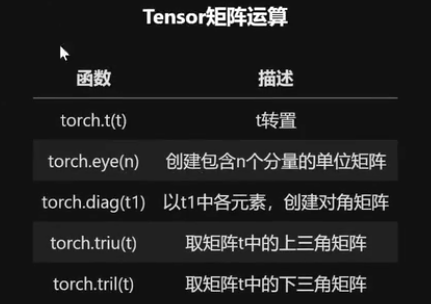

In [2]:
t1 = torch.arange(1, 7).reshape(2, 3).float()
t1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [3]:
# 转置
torch.t(t1)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [4]:
t1.t()

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [5]:
torch.eye(3) #单位矩阵

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [6]:
t = torch.arange(5)
t

tensor([0, 1, 2, 3, 4])

In [7]:
torch.diag(t)

tensor([[0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 0, 0, 3, 0],
        [0, 0, 0, 0, 4]])

In [8]:
# 对角线向上偏移一位
torch.diag(t, 1)   #(6, 6)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 4],
        [0, 0, 0, 0, 0, 0]])

In [9]:
# 对角线向下偏移一位
torch.diag(t, -1)   #(6, 6)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0],
        [0, 0, 0, 3, 0, 0],
        [0, 0, 0, 0, 4, 0]])

In [10]:
t1 = torch.arange(9).reshape(3, 3)
t1

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [11]:
# 取上三角矩阵
torch.triu(t1)

tensor([[0, 1, 2],
        [0, 4, 5],
        [0, 0, 8]])

In [12]:
# 上三角矩阵向左下偏移一位
torch.triu(t1, -1)

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 7, 8]])

In [13]:
# 上三角矩阵向右上偏移一位
torch.triu(t1, 1)

tensor([[0, 1, 2],
        [0, 0, 5],
        [0, 0, 0]])

In [14]:
# 下三角矩阵
torch.tril(t1)

tensor([[0, 0, 0],
        [3, 4, 0],
        [6, 7, 8]])

## 三.矩阵的基本运算

矩阵不同于普通的二维数组，其具有一定的线性代数含义，而这些特殊性质主要体现在矩阵的基本运算上。

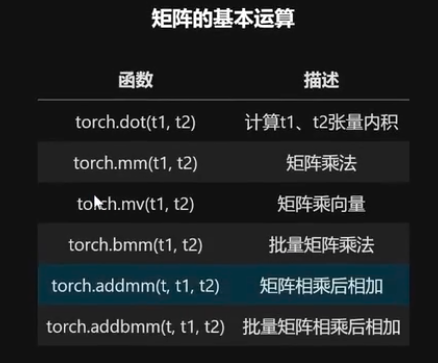

* `dot/vdot`：点积计算

**注：在PyTorch中，dot和vdot只能作用于一维张量（向量），且对于数值型对象，二者计算结果并没有区别，两种函数只有进行复数运算时会有区别**

In [15]:
t = torch.arange(1, 4)
t

tensor([1, 2, 3])

In [16]:
torch.dot(t, t)

tensor(14)

In [17]:
torch.vdot(t, t)

tensor(14)

In [18]:
t1

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [19]:
#不能进行除了一维张量以外的计算
torch.dot(t1, t1)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

* mm:矩阵乘法

在PyTorch中，矩阵乘法其实是一个函数簇，除了矩阵乘法以外，还有批量矩阵乘法，矩阵相乘相加，批量矩阵相乘相加等函数

In [20]:
t1 = torch.arange(1, 7).reshape(2, 3)
t1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [21]:
t2 = torch.arange(1, 10).reshape(3, 3)
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [23]:
t1 * t1   #对应位置元素相乘

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [24]:
# 矩阵乘法
torch.mm(t1, t2)

tensor([[30, 36, 42],
        [66, 81, 96]])

矩阵乘法执行过程：

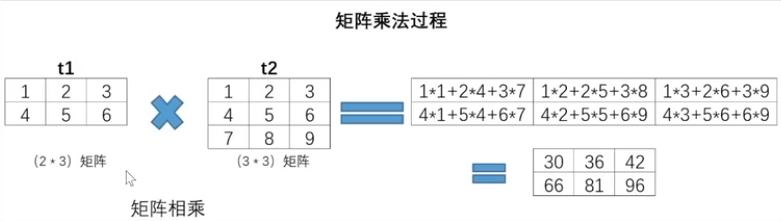

* mv:矩阵和向量相乘

PyTorch中提供了一类非常特殊的矩阵和向量相乘的函数，矩阵和向量相乘的过程我们可以堪称是先将向量转化为列向量然后再相乘

In [25]:
met = torch.arange(1, 7).reshape(2, 3)
met

tensor([[1, 2, 3],
        [4, 5, 6]])

In [26]:
vec = torch.arange(1, 4)
vec

tensor([1, 2, 3])

向量和矩阵相乘过程中，需要矩阵的列数和向量的元素个数相同。

In [27]:
torch.mv(met, vec)

tensor([14, 32])

In [28]:
torch.mv(vec, met)

RuntimeError: vector + matrix @ vector expected, got 1, 1, 2

In [29]:
vec.reshape(3, 1)  #转化为列向量,实际已经是二维张量了，即可以视为矩阵

tensor([[1],
        [2],
        [3]])

In [30]:
torch.mm(met, vec.reshape(3, 1))

tensor([[14],
        [32]])

In [31]:
torch.mm(met, vec.reshape(3, 1)).flatten()

tensor([14, 32])

**理解：mv函数本质上提供了一种二维张量和一维张量相乘的方法，在线性代数运算过程中，有很多矩阵乘向量的场景，典型的如线性回归求解过程，通常情况下我们需要将向量转化为列向量（或者某些编程语言默认向量为列向量）然后进行计算，但PyTorch中单独设置了一个矩阵和向量相乘的方法，从而简化了行/列向量的理解过程和将向量转化为列向量的转化过程。**

* bmm:批量矩阵相乘

所谓批量矩阵相乘，指的是三维张量的矩阵乘法。根据此前对张量结构的理解，我们知道，三维张量就是一个包含多个相同形状的矩阵的集合。例如，一个（3，2， 2）的张量，本质上就是一个包含了3个2\*2矩阵的张量。而三维张量的矩阵相乘，则是三维张量内部各对应位置的矩阵相乘。由于张量的运算往往涉及二维及以上，因此批量矩阵相乘也有很多应用场景。

In [32]:
t3 = torch.arange(1, 13).reshape(3, 2, 2)
t3

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [33]:
t4 = torch.arange(1, 19).reshape(3, 2, 3)
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

In [34]:
torch.bmm(t3, t4)

tensor([[[  9,  12,  15],
         [ 19,  26,  33]],

        [[ 95, 106, 117],
         [129, 144, 159]],

        [[277, 296, 315],
         [335, 358, 381]]])

#### Point:

* 三维张量包含的矩阵个数需要相同

* 每个内部矩阵，需要满足矩阵乘法条件

* addmm:矩阵相乘后相加

addmm函数结构：`addmm(input, mat1, mat2, beta=1, alpha=1)`

输出结果:`beta * input + alpha * (mat1 * mat2)`

In [35]:
t1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [36]:
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [37]:
t = torch.arange(3)
t

tensor([0, 1, 2])

In [38]:
torch.mm(t1, t2)

tensor([[30, 36, 42],
        [66, 81, 96]])

In [39]:
torch.addmm(t, t1, t2)  #先乘法后相加

tensor([[30, 37, 44],
        [66, 82, 98]])

In [40]:
torch.addmm(t, t1, t2, beta=0, alpha=10)

tensor([[300, 360, 420],
        [660, 810, 960]])

* addbmm:批量矩阵相乘后相加

和addmm类似，都是先乘后加，并且可以设置权重。不同的是addbmm是批量矩阵相乘，并且在相加过程中也是矩阵相加，而非向量加矩阵。

In [41]:
t = torch.arange(6).reshape(2, 3)
t

tensor([[0, 1, 2],
        [3, 4, 5]])

In [42]:
t3

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [43]:
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

In [46]:
t

tensor([[0, 1, 2],
        [3, 4, 5]])

In [44]:
torch.bmm(t3, t4)

tensor([[[  9,  12,  15],
         [ 19,  26,  33]],

        [[ 95, 106, 117],
         [129, 144, 159]],

        [[277, 296, 315],
         [335, 358, 381]]])

In [45]:
torch.addbmm(t, t3, t4)  #??

tensor([[381, 415, 449],
        [486, 532, 578]])

注：addbmm会在原来三维张量基础上，对其内部矩阵进行求和

## 四.矩阵的线性代数运算

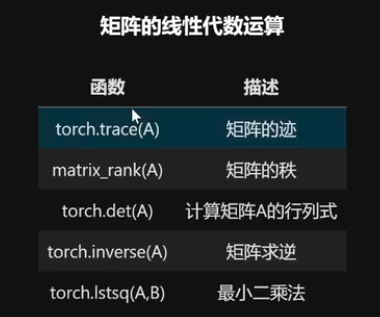

### 1.矩阵的迹(trace)

矩阵的迹就是矩阵对角线元素之和，在PyTorch中可以使用trace函数进行计算

In [48]:
A = torch.tensor([[1, 2], [4, 5]]).float()
A

tensor([[1., 2.],
        [4., 5.]])

In [49]:
torch.trace(A)

tensor(6.)

对于矩阵的迹来说，计算过程不需要是方阵

In [50]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [51]:
torch.trace(B)

tensor(6)

### 2.矩阵的秩(rank)

矩阵的秩(rank)是指矩阵中行或列的极大线性无关数，且矩阵中行，列极大无关数总是相同的，任何矩阵的秩都是唯一的，满秩指的是方阵(行数和列数相同的矩阵)中行数、列数和秩相同，满秩矩阵有线性唯一解等重要特性，而其他矩阵也能通过求解秩来降维，同时，秩也是奇异值分解等运算中涉及到的重要概念。

* matrix_rank计算矩阵的秩

In [52]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [53]:
torch.matrix_rank(A)

tensor(2)

In [54]:
B = torch.tensor([[1, 2], [2, 4]]).float()
B

tensor([[1., 2.],
        [2., 4.]])

In [55]:
torch.matrix_rank(B)

tensor(1)

对于矩阵B来说，第一行和第二行明显线性相关，最大线性无关组只有一组，因此矩阵的秩为1

### 3.矩阵的行列式(det)

所谓行列式，可以简单理解为矩阵的一个基本性质或属性，通过行列式的计算我们能够知道矩阵是否可逆，从而可以进一步求解矩阵对应的线性方程。当然更加专业的解释，行列式作为一个基本数学工具，实际上就是矩阵进行线性变换的伸缩因子。

对于任何一个n维方阵，行列式计算过程如下：

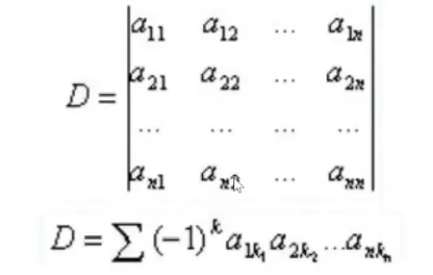

更为简单的情况，如果对于一个2\*2的矩阵，行列式的计算就是主对角线元素之积减去另外两个元素之积。

In [56]:
A = torch.tensor([[1, 2], [4, 5]]).float()  #秩的计算要求是浮点型张量
A

tensor([[1., 2.],
        [4., 5.]])

In [58]:
B

tensor([[1., 2.],
        [2., 4.]])

In [57]:
torch.det(A)

tensor(-3.)

In [59]:
torch.det(B)

tensor(-0.)

对于行列式的计算，要求二维张量必须为方阵，即行列数相同

In [60]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [61]:
torch.det(B)

RuntimeError: A must be batches of square matrices, but they are 3 by 2 matrices

### 3.线性方程组的矩阵表达形式

通常来说，我们会把高维空间的一个个数看成是向量，而由这些向量组成的数组看成是一个矩阵。如：(1, 2), (3, 4)是二维空间中的两个点，矩阵A就代表这两个点组成的矩阵。

In [62]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

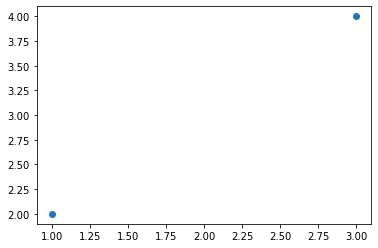

In [64]:
plt.plot(A[:,0], A[:,1], 'o')

如果更进一步，我们希望在二维空间中找到一条直线，来拟合这两个点，也就是所谓的构建一个线性回归模型，我们设线性回归方程为：
$$y=ax+b$$    
代入(1, 2)和(3, 4)两个点之后，我们还可以进一步将表达式改写成矩阵表示形式，改写如下：

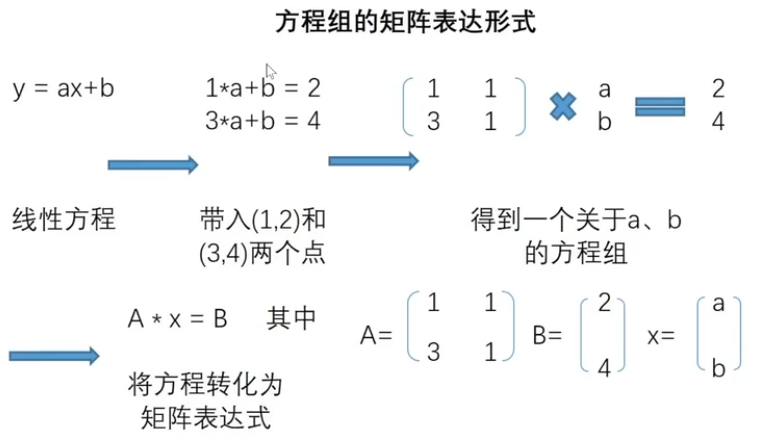

$$X = A^{-1}* B$$  

* inverse函数：求解逆矩阵

根据上述矩阵表达式，重新定义A和B

In [65]:
A = torch.tensor([[1.0, 1], [3, 1]])
A

tensor([[1., 1.],
        [3., 1.]])

In [66]:
B = torch.tensor([2.0, 4])
B

tensor([2., 4.])

In [67]:
torch.inverse(A)

tensor([[-0.5000,  0.5000],
        [ 1.5000, -0.5000]])

#简单试探逆矩阵的基本特性
torch.mm(torch.inverse(A), A)

In [69]:
torch.mm(A, torch.inverse(A))

tensor([[ 1.0000e+00, -5.9605e-08],
        [-1.1921e-07,  1.0000e+00]])

In [70]:
torch.mv(torch.inverse(A), B)

tensor([1.0000, 1.0000])

最终得到的线性方程为：$y=x+1$   

## 五.矩阵的分解

矩阵的分解也是矩阵运算中的常规计算，矩阵分解有很多种类，常见的如QR分解、LU分解、特征分解、SVD分解等等。值得一提的是，此前的逆矩阵，其实也可以将其看成是一种矩阵分解方式，分解后的等式如下：
$$A = A * A^{-1} * A$$

而大多数情况下，矩阵分解都是分解成形如下述形式：

$$A = VUD$$

#### 1.特征分解

特征分解中，矩阵分解形式为：
$$A = Q\Lambda Q^{-1}$$

其中 $Q$和$Q^{-1}$互为逆矩阵，并且Q的列就是A的特征值所对应的特征向量，而$\Lambda$为矩阵A的特征值按照降序排列组成的对角矩阵。

* torch.eig函数：特征分解

In [71]:
A = torch.arange(1, 10).reshape(3, 3).float()
A

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [72]:
torch.eig(A, eigenvectors=True)

torch.return_types.eig(
eigenvalues=tensor([[ 1.6117e+01,  0.0000e+00],
        [-1.1168e+00,  0.0000e+00],
        [ 2.9486e-07,  0.0000e+00]]),
eigenvectors=tensor([[-0.2320, -0.7858,  0.4082],
        [-0.5253, -0.0868, -0.8165],
        [-0.8187,  0.6123,  0.4082]]))

输出结果中，eigenvalues表示特征值向量，即A矩阵分解后的$\Lambda$矩阵的对角元素值，并按照从大到小依次排序，eigenvectors表示A矩阵分解后的Q矩阵，此处需要理解特征值，所谓特征值可简单理解为对应列在矩阵中的信息权重，如果该列能够简单线性变换来表示其他列，则说明该列信息权重较大，反之则较小，特征值概念和秩的概念有点类似，但不完全相同，矩阵的秩表示矩阵列向量的最大线性无关数，而特征值的大学则是表达某列向量能多大程度解读矩阵列向量的变异度，即包含信息量。

In [73]:
B = torch.tensor([1, 2 ,2, 4]).reshape(2, 2).float()
B

tensor([[1., 2.],
        [2., 4.]])

In [74]:
torch.matrix_rank(B)

tensor(1)

In [75]:
torch.eig(B)  #只有一个有效特征

torch.return_types.eig(
eigenvalues=tensor([[0., 0.],
        [5., 0.]]),
eigenvectors=tensor([]))

In [76]:
C = torch.tensor([[1, 2, 3], [2, 4, 6], [3, 6, 9]]).float()
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [77]:
torch.eig(C)

torch.return_types.eig(
eigenvalues=tensor([[ 1.4000e+01,  0.0000e+00],
        [ 6.2356e-08,  0.0000e+00],
        [-2.8243e-07,  0.0000e+00]]),
eigenvectors=tensor([]))

特征值一般用于表示矩阵对应线性方程组解空间以及数据降维，当然由于特征分解只能作用于方阵，而大多数实际情况下矩阵的行列数未必相等，此时要进行类似操作就需要采用和特征值分解思想类似的奇异值分解(SVD).

### 2.奇异值分解(SVD)

奇异值分解是特征值分解在奇异矩阵上的推广形式，它将一个维度为m\*n的奇异矩阵A分解为三个部分：
$$A=U\Sigma V^T$$

其中U,V是两个正交矩阵，其中每一行(每一列)分别被称为左奇异向量和右奇异向量，他们和$\Sigma$中对角线上的奇异值相对应，通常情况下我们只需要保留前k个奇异向量和奇异值即可，其中U是m\*k矩阵，V是n\*k矩阵，$\Sigma$是k\*k的方阵，从而达到减少存储空间的效果，即：
$$A_{m*n}=U_{m*m}\Sigma_{m*n}V_{n*n}^T\approx U_{m*k}\Sigma_{k*k}V_{k*n}^T$$

* svd奇异值分解函数

In [78]:
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [79]:
torch.svd(C)

torch.return_types.svd(
U=tensor([[-2.6726e-01,  9.6362e-01, -3.7767e-08],
        [-5.3452e-01, -1.4825e-01, -8.3205e-01],
        [-8.0178e-01, -2.2237e-01,  5.5470e-01]]),
S=tensor([1.4000e+01, 4.2751e-08, 1.6397e-15]),
V=tensor([[-0.2673, -0.9636,  0.0000],
        [-0.5345,  0.1482, -0.8321],
        [-0.8018,  0.2224,  0.5547]]))

In [80]:
CU, CS, CV = torch.svd(C)

验证SVD分解

In [81]:
torch.diag(CS)

tensor([[1.4000e+01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.2751e-08, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.6397e-15]])

In [82]:
torch.mm(torch.mm(CU, torch.diag(CS)), CV.t())

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

能够看出，上述输出完整还原了C矩阵，此时我们可根据svd输出结果对C进行降维，此时C可只保留第一列（后面的奇异值过小），即k=1

In [83]:
U1 = CU[:, 0].reshape(3, 1)
U1

tensor([[-0.2673],
        [-0.5345],
        [-0.8018]])

In [84]:
C1 = CS[0]
C1

tensor(14.0000)

In [86]:
V1 = CV[:, 0].reshape(1, 3)  #V的第一行
V1

tensor([[-0.2673, -0.5345, -0.8018]])

In [87]:
torch.mm((U1 * C1), V1)

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

此时输出的Cd矩阵已经和原矩阵C高度相似了，损失信息在R的计算中基本可以忽略不计，经过SVD分解，矩阵的信息能够被压缩至更小的空间内进行存储，从而为PCA、LSI(潜在语义索引)等算法做好了数学工具层面的铺垫。